# Comparing variabilities between ONI/ENSO and GRACE's Total Water Storage in South America 
## VCM-02 Internship Final Report

### Andyara Callegare
### oliveiracallegare@uni-potsdam.de

### Introduction
In South America, in-situ measurements are not the most abundant, but over the last decades, an increased number of remote sensors showed an unprecedented view of the region. The unique Gravity Recovery and Climate Experiment (GRACE) and its successor Gravity Recovery and Climate Experiment-Follow-On (GRACE-FO) have been orbiting the earth since 2002 and uses gravity to map water masses and their changes. Its variable Total Water Storage (TWS) change is defined as changes in water stored on the surface (e.g., lakes and reservoirs, rivers, and snow water equivalent), over the entire soil profile, and in groundwater (Long et al., 2015). 

The El Nino-Southern Oscillation (ENSO) is the dominant interannual variability of Earth’s climate system and plays a central role in global climate prediction. Outlooks of ENSO and its impacts often follow a two-tier approach: predicting ENSO sea surface temperature anomaly in tropical Pacific and then predicting its global impacts(Lin & Qian, 2019). El Niño and La Niña events denote sea-surface temperature (SST) conditions in the tropical Pacific that are, respectively, warmer and colder than average (McPhaden et al., 2006), as seen in Figure 1 by Chiodi & Harrison, 2015.

Muñoz et al., 2016, describes the effects of this system in the Americas, Figure 2. As a starting point to understand the variability in South America this internship focus on the two major river basins: Amazon and La Plata. For the desired study area the expected pattern during El Niño the Amazon (La Plata) basin is dry (wet) from June (September) to march (January). The pattern during La Niña for the Amazon (La Plata) basin is wet (dry) from June (August) to march (December).

Since ENSO affects the rainfall, which is the primary contributor to TWS, it is expected to see a relationship between strong ENSO events, both positive and negative, reflected in TWS.
This report seeks out to give insight into the following questions: 

a) What are the seasonal patterns of TWS? Is there a clear trend?

b) Can GRACE TWS be fit into a simple model? 

c) Is there a relationship between ENSO and GRACE?

### WMO Basins

The study area comprehends the major river basins from South America (90°W–30°W; 65°S–20°N), shown in Figure 3. The geometry was extracted from the WMO Basins 2020 shapefile, available at *, the major basins were calculated by dissolving the WMOBB\_BASI attribute and summoning the Shape\_Area. Analysis will be carried for the 2 biggest basins. Amazon has 4.8 M km2, followed by Rio de La Plata with 3.0 M km2, since they are located on the regions expected to have inverse relationship.

The study area comprehends the 2 biggest major river basins from South America (90°W–30°W; 65°S–20°N), Amazon and Rio de La Plata, shown in Figure 3. The geometry was extracted from the WMO Basins 3rd, revised and extended edition 2020, available at https://www.bafg.de/GRDC/EN/02_srvcs/22_gslrs/223_WMO/wmo_regions_node.html#doc2763412bodyText7.

In [1]:
import geopandas as gpd

# open file
world_basins = gpd.read_file('../data/external/wmo_basins_shp/wmobb_basins.shp')

In [2]:
# show table
world_basins

,WMOBB,WMOBB_NAME,WMOBB_BASI,WMOBB_SUBB,WMOBB_DESC,REGNUM,REGNAME,WMO306_MoC,WMO306_M_1,SUM_SUB_AR,Shape_Leng,Shape_Area,geometry
0,101,MEDJERDA (also MAJARDAH),MEDJERDA (also MAJARDAH),---,Medjerda river basin,1,Africa,1,Mejerda,23171.5,11.762517,2.320339,"POLYGON ((10.17917 37.12083, 10.17881 37.11841..."
1,102,MELRHIR and RHARSA,MELRHIR and RHARSA,---,"Chott el Rharsa interior basin, Chott Melrhir ...",1,Africa,2,Ch. Melrhir and el Rharsa,260760.5,39.683524,25.182484,"POLYGON ((2.64583 30.12917, 2.64466 30.13374, ..."
2,103,DJERID,DJERID,---,Chott el Djerid interior basin,1,Africa,3,Ch. El Djerid,59021.0,13.773538,5.687699,"POLYGON ((10.11667 32.43750, 10.11008 32.43785..."
3,104,"Mediterranean Sea (ex 161, 627, 928, 691, 693)",Mediterranean Sea,---,basins draining into Mediterranean Sea between...,1,Africa,4,Algerian coast,146658.8,55.448069,14.626120,"MULTIPOLYGON (((-2.43694 35.17975, -2.43889 35..."
4,105,HODNA,HODNA,---,Chott el Hodna interior basin,1,Africa,5,Ch. El Hodna,34051.7,11.808258,3.374844,"POLYGON ((6.03750 35.58750, 5.99583 35.58750, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,698,Greenland,Greenland,---,basins on Greenland island,6,Europe,98,---,2146715.6,1426.834686,662.170443,"MULTIPOLYGON (((-43.89015 59.74503, -43.89306 ..."
512,571,Hawaiian Islands,Hawaiian Islands,---,basins on Hawaiian islands,5,South-West Pacific,71,Hawaii,0.0,11.956685,1.429011,"MULTIPOLYGON (((-159.33797 21.95150, -159.4423..."
513,573,"Polynesia (ex 563, 564, 565, 566, 567, 571)",Polynesia,---,"basins on Polynesia islands, except Hawaiian i...",5,South-West Pacific,73,---,0.0,11.708155,0.528264,"MULTIPOLYGON (((-176.63109 0.79542, -176.63617..."
514,295,EUPHRATES and TIGRIS in Asia,EUPHRATES and TIGRIS in Asia,---,"Euphrates river basin in Asia, Tigris river ba...",2,Asia,95,spare,544990.4,54.195426,52.631828,"POLYGON ((48.45833 29.99167, 48.45798 29.99409..."


In [3]:
# select attributes
world_basins = world_basins[['REGNAME','WMOBB_BASI', 'geometry', 'Shape_Area']]

# get only SA basins
SA_basins_minor = world_basins[world_basins['REGNAME'] == "South America"] 

# dissolve to only the major basins
# function sum to get all the area of the basins
SA_basins = SA_basins_minor.dissolve(by='WMOBB_BASI', aggfunc='sum') 

# organize as descending order of area
SA_basins.sort_values(by=['Shape_Area'], inplace=True, ascending=False)

# save file
SA_basins.to_file('../data/processed/basinsSA/basins_dissolved.shp')

In [4]:
# you can open saved file if you already done the processing before
SA_basins = gpd.read_file('../data/processed/basinsSA/basins_dissolved.shp')

In [5]:
# show attribute table
SA_basins

,WMOBB_BASI,Shape_Area,geometry
0,AMAZON (also Amazonas),488.059318,"POLYGON ((-69.16250 -14.76250, -69.16285 -14.7..."
1,RIO DE LA PLATA,300.079899,"MULTIPOLYGON (((-58.40417 -34.26250, -58.40525..."
2,South Atlantic,179.752634,"MULTIPOLYGON (((-69.32575 -55.84509, -69.32639..."
3,South Pacific,90.886759,"MULTIPOLYGON (((-72.95360 -54.44320, -72.95482..."
4,ORINOCO,76.569883,"POLYGON ((-74.21667 4.01250, -74.21752 4.01582..."
5,TOCANTINS,63.831247,"POLYGON ((-48.85833 -4.67083, -48.85769 -4.672..."
6,"SALADO (also DESAGUADERO also BERMEJO), COLORA...",53.628740,"POLYGON ((-68.79252 -27.76335, -68.79167 -27.7..."
7,SAO FRANCISCO,53.093711,"POLYGON ((-38.71667 -7.62500, -38.71591 -7.628..."
8,North Atlantic,34.620066,"MULTIPOLYGON (((-49.32119 -1.65209, -49.32222 ..."
9,CHUBUT and DESEADO and CHICO and SANTA CRUZ an...,29.940542,"MULTIPOLYGON (((-71.98529 -47.70473, -71.97991..."


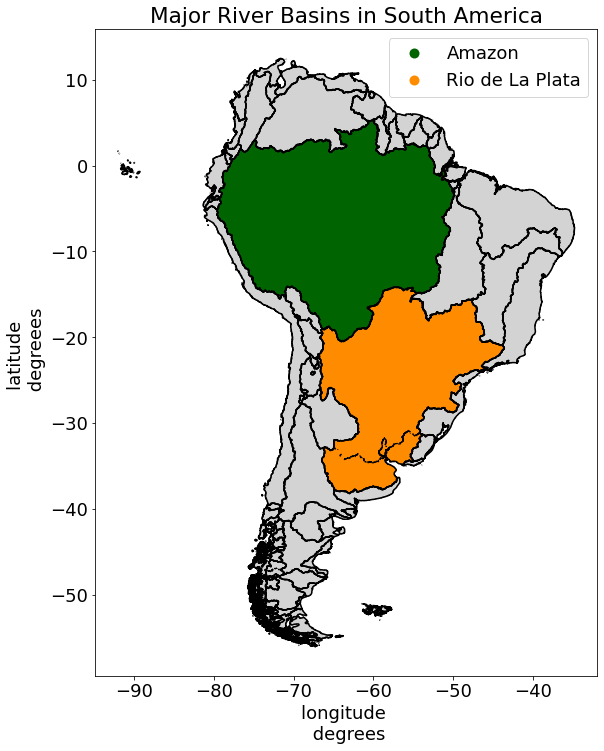

In [6]:
# plot SA basins
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 18})

# create figure
fig, ax = plt.subplots(figsize=(9,12))

# plot unused basins
cmap_lightgray = ListedColormap(['lightgray']) # cmap with light gray
SA_basins.plot(ax=ax, column='WMOBB_BASI', cmap=cmap_lightgray, legend=False)


# plot selected basins
cmap_basins = ListedColormap(['darkgreen', 'darkorange']) # cmap for the used basins
SA_basins[0:2].plot(ax=ax, column='WMOBB_BASI', cmap=cmap_basins, legend=True)
SA_basins.boundary.plot(ax = ax, edgecolor="black")

# legend
leg = ax.get_legend()

# write legend in a prettier way
leg.get_texts()[0].set_text('Amazon')
leg.get_texts()[1].set_text('Rio de La Plata')

# Title and axis
plt.title('Major River Basins in South America')
plt.xlabel('longitude \n degrees')
plt.ylabel('latitude \n degreees')

# save figure
plt.savefig('../figures/01_basins.png',bbox_inches = 'tight', dpi=600)

The major basins were calculated by dissolving the ‘WMOBB_BASI’ attribute and summoning the ‘Shape_Area’.

South America has 43 major basins.

Amazon has approximately 4.9 M km2, followed by Rio de La Plata with 3.0 M km2.

### ONI

The Oceanic Niño Index (ONI) is NOAA's primary indicator for monitoring El Niño and La Niña, which are opposite phases of the climate pattern called the El Niño-Southern Oscillation, or “ENSO” for short. NOAA considers El Niño conditions to be present when the Oceanic Niño Index is +0.5 or higher, indicating the east-central tropical Pacific is significantly warmer than usual. La Niña conditions exist when the Oceanic Niño Index is -0.5 or lower, indicating the region is cooler than usual. The dataset is available at https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

The ONI tracks the running 3-month average sea surface temperatures in the east-central tropical Pacific between 120°-170°W. This area is called the Niño 3.4 region, and its shown in Figure 4.

In [7]:
import pandas as pd

# open file
oni = pd.read_csv('../data/external/oni/oni.ascii.txt', sep = '\s+')

In [8]:
# show table
oni

,SEAS,YR,TOTAL,ANOM
0,DJF,1950,24.72,-1.53
1,JFM,1950,25.17,-1.34
2,FMA,1950,25.75,-1.16
3,MAM,1950,26.12,-1.18
4,AMJ,1950,26.32,-1.07
...,...,...,...,...
849,SON,2020,25.54,-1.17
850,OND,2020,25.40,-1.27
851,NDJ,2020,25.43,-1.19
852,DJF,2021,25.59,-1.05


In [9]:
# transform seasonal abreviation to datetime
import datetime

# define function to translate central month as datetime month, day ios fixed to 15
def oni2datetime(SEAS,yy):
    if SEAS =='DJF':
        mm = 1
    elif SEAS == 'JFM':
        mm = 2
    elif SEAS == 'FMA':
        mm = 3
    elif SEAS == 'MAM':
        mm = 4
    elif SEAS == 'AMJ':
        mm = 5
    elif SEAS == 'MJJ':
        mm = 6
    elif SEAS == 'JJA':
        mm = 7
    elif SEAS == 'JAS':
        mm = 8
    elif SEAS == 'ASO':
        mm = 9
    elif SEAS == 'SON':
        mm = 10
    elif SEAS == 'OND':
        mm = 11
    elif SEAS == 'NDJ':
        mm = 12

    return datetime.datetime(yy,mm,15)

# apply function
dates = []
for i in iter(range(0,len(oni))):
    dates.append(oni2datetime(oni.SEAS[i],oni.YR[i]))

oni['dates'] = dates

# reindex to datetime
oni.index = oni.dates

In [10]:
# show updated table
oni

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1950-01-15,DJF,1950,24.72,-1.53,1950-01-15
1950-02-15,JFM,1950,25.17,-1.34,1950-02-15
1950-03-15,FMA,1950,25.75,-1.16,1950-03-15
1950-04-15,MAM,1950,26.12,-1.18,1950-04-15
1950-05-15,AMJ,1950,26.32,-1.07,1950-05-15
...,...,...,...,...,...
2020-10-15,SON,2020,25.54,-1.17,2020-10-15
2020-11-15,OND,2020,25.40,-1.27,2020-11-15
2020-12-15,NDJ,2020,25.43,-1.19,2020-12-15


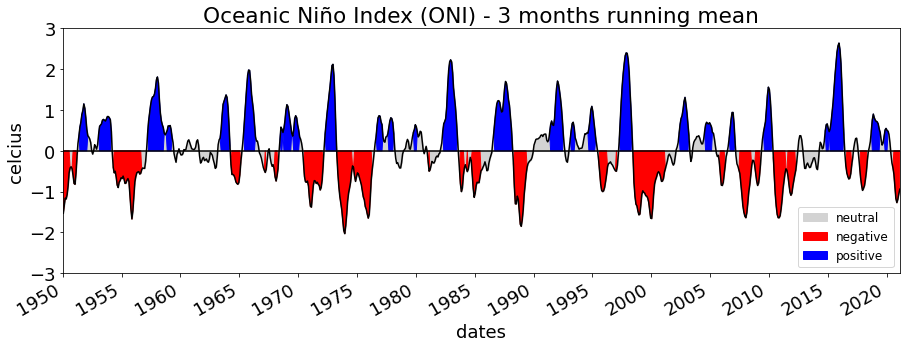

In [11]:
import matplotlib.dates as mdates
import numpy as np

# plot ONI
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(oni.index, oni.ANOM, color = 'k')

# horizontal line in 0
plt.axhline(y=0, color = 'k')

# fill values in gray, neutral years
plt.fill_between(oni.index, oni.ANOM, 0,
                color='lightgray', interpolate=True, label = 'neutral')

# fill values <0.5 in red, la nina
plt.fill_between(oni.index, oni.ANOM, 0,
                 where=(oni.ANOM <= -0.5),
                color='r', interpolate=True, label = 'negative')

# fill values >0.5 in blue, el nino
plt.fill_between(oni.index, oni.ANOM, 0,
                 where=(oni.ANOM >= 0.5),
                 color='b', interpolate=True, label = 'positive')



# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(5)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("1950-01-01"),pd.Timestamp("2021-02-15"))
fig.autofmt_xdate()
plt.xlabel('dates')

# format y label
plt.yticks(np.arange(-3, 4, 1)) 
plt.ylabel('celcius')

# Title and axis
plt.title('Oceanic Niño Index (ONI) - 3 months running mean')

# legend 
plt.legend(prop={'size':12})

# save figure
plt.savefig('../figures/02_oni.png',bbox_inches = 'tight', dpi=600)

In [12]:
# find highest months
oni_positive = oni[oni.ANOM>0.5]
oni_positive = oni_positive.sort_values('ANOM', ascending=False)

oni_positive[0:10]

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
2015-12-15,NDJ,2015,29.26,2.64,2015-12-15
2015-11-15,OND,2015,29.25,2.57,2015-11-15
2016-01-15,DJF,2016,29.12,2.48,2016-01-15
2015-10-15,SON,2015,29.14,2.42,2015-10-15
1997-11-15,OND,1997,29.02,2.40,1997-11-15
1997-12-15,NDJ,1997,28.97,2.39,1997-12-15
1997-10-15,SON,1997,29.01,2.33,1997-10-15
1998-01-15,DJF,1998,28.87,2.24,1998-01-15
1982-12-15,NDJ,1982,28.76,2.23,1982-12-15


In [13]:
# sort by date
oni_positive_10 = oni_positive[0:10]
oni_positive_10 = oni_positive_10.sort_index()
oni_positive_10

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1982-12-15,NDJ,1982,28.76,2.23,1982-12-15
1983-01-15,DJF,1983,28.79,2.18,1983-01-15
1997-10-15,SON,1997,29.01,2.33,1997-10-15
1997-11-15,OND,1997,29.02,2.40,1997-11-15
1997-12-15,NDJ,1997,28.97,2.39,1997-12-15
1998-01-15,DJF,1998,28.87,2.24,1998-01-15
2015-10-15,SON,2015,29.14,2.42,2015-10-15
2015-11-15,OND,2015,29.25,2.57,2015-11-15
2015-12-15,NDJ,2015,29.26,2.64,2015-12-15


In [14]:
# oni[(oni.index >= '1982-04')& (oni.index <= '1983-09')]
# oni[(oni.index >= '1997-04')& (oni.index <= '1998-06')]
# oni[(oni.index >= '2014-09')& (oni.index <= '2016-06')]

The highest 10 months have anomalies ranging from 2.18 to 2.64 °C. These values are divided into 3 episodes.

The most intense one has its peak in 1982-12, values above 0.5 started in 1982-05 and were continuously above this threshold until 1983-08, 15 months in total. The two highest values were registered during this episode.

The second most intense episode has its peak in 1997-10, values above 0.5 started in 1997-05 and were continuously above this threshold until 1998-04, 12 months in total. The 3rd to 6th highest values were registered during this episode.

And the third one has its peak in 2015-12, values above 0.5 started in 2014-10 and were continuously above this threshold until 2016-04, 19 months in total. The 7th to 10th highest values were registered during this episode.

In [15]:
# find lowest months
oni_negative = oni[oni.ANOM<0.5]
oni_negative = oni_negative.sort_values('ANOM', ascending=True)

oni_negative[0:10]

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1973-12-15,NDJ,1973,24.38,-2.03,1973-12-15
1973-11-15,OND,1973,24.47,-1.95,1973-11-15
1988-12-15,NDJ,1988,24.63,-1.85,1988-12-15
1974-01-15,DJF,1974,24.64,-1.84,1974-01-15
1988-11-15,OND,1988,24.71,-1.80,1988-11-15
1973-10-15,SON,1973,24.71,-1.71,1973-10-15
1989-01-15,DJF,1989,24.84,-1.69,1989-01-15
1955-11-15,OND,1955,24.41,-1.67,1955-11-15
2000-01-15,DJF,2000,24.96,-1.66,2000-01-15


In [16]:
oni_negative_10 = oni_negative[0:10]
oni_negative_10 = oni_negative_10.sort_index()
oni_negative_10

,SEAS,YR,TOTAL,ANOM,dates
dates,,,,,
1955-11-15,OND,1955,24.41,-1.67,1955-11-15
1973-10-15,SON,1973,24.71,-1.71,1973-10-15
1973-11-15,OND,1973,24.47,-1.95,1973-11-15
1973-12-15,NDJ,1973,24.38,-2.03,1973-12-15
1974-01-15,DJF,1974,24.64,-1.84,1974-01-15
1988-11-15,OND,1988,24.71,-1.80,1988-11-15
1988-12-15,NDJ,1988,24.63,-1.85,1988-12-15
1989-01-15,DJF,1989,24.84,-1.69,1989-01-15
1999-12-15,NDJ,1999,24.93,-1.65,1999-12-15


In [17]:
# oni[(oni.index >= '1954-04')& (oni.index <= '1956-10')]
# oni[(oni.index >= '1973-04')& (oni.index <= '1976-05')]
# oni[(oni.index >= '1988-04')& (oni.index <= '1989-06')]
# oni[(oni.index >= '1998-06')& (oni.index <= '2001-03')]

The lowest 10 months have anomalies ranging from -2.03 to -1.65 °C. These values are divided into 4 episodes.

The most intense one has its peak in 1955-11, values below -0.5 started in 1954-05 and were continuously below this threshold until 1956-08, 28 months in total. The lowest value was registered during this episode.

The second most intense episode has its peak in 1973-11, values below -0.5 started in 1973-05 and were continuously below this threshold until 1976-03, 35 months in total. The 1st, 2nd, 4th and 6th lowest values were registered during this episode.

The third most intense has its peak in 1988-12, values below -0.5 started in 1988-05 and were continuously below this threshold until 1989-05, 13 months in total. The 3rd, 5th and 7th lowest values were registered during this episode.

And the fourth most intense episode has its peak in 2000-01, values bellow -0.5 started in 1998-06 and were continuously below this threshold until 2001-02, 31 months. The 9th and 10th lowest values were registered during this episode.

Positive episodes have a higher amplitude and shorter length compared with the positive ones.

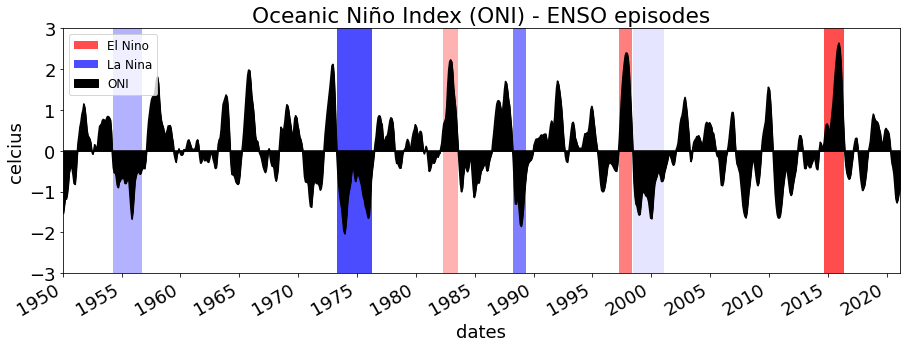

In [18]:
import matplotlib.dates as mdates
import numpy as np

# plot ONI
fig, ax = plt.subplots(figsize=(15,5))


# horizontal line in 0
plt.axhline(y=0, color = 'k')


# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(5)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("1950-01-01"),pd.Timestamp("2021-02-15"))
fig.autofmt_xdate()
plt.xlabel('dates')

# format y label
plt.yticks(np.arange(-3, 4, 1)) 
plt.ylabel('celcius')

# Title and axis
plt.title('Oceanic Niño Index (ONI) - ENSO episodes')

# mark biggest ENSO episodes
ymin = -3
ymax = 3
plt.ylim(ymin, ymax)

# mark el nino
elnino = dict({'start':['2014-09','1997-04','1982-04'], 'end':['2016-06','1998-06','1983-09'], 'alpha' :[0.70,0.50,0.30]})
for i in iter(range(0,len(elnino['start']))):
    plt.fill_between(oni.index, -6, 6, where=(oni.index >= elnino['start'][i]) & (oni.index <= elnino['end'][i]), facecolor='red', alpha = elnino['alpha'][i], label = 'El Nino')

# mark la nina
lanina = dict({'start':['1973-04','1988-04','1954-04','1998-06'], 'end':['1976-05','1989-06','1956-10','2001-03'], 'alpha' :[0.70,0.50,0.30,0.10]})
for i in iter(range(0,len(lanina['start']))):
    plt.fill_between(oni.index, -6, 6, where=(oni.index >= lanina['start'][i]) & (oni.index <= lanina['end'][i]), facecolor='blue', alpha = lanina['alpha'][i], label = 'La Nina')

# plot ONI
plt.plot(oni.index, oni.ANOM, color = 'k')
plt.fill_between(oni.index, oni.ANOM, 0, color = 'k', alpha = 1,label = 'ONI')

# plot legend
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique),loc='upper left', prop={'size':12})
    
legend_without_duplicate_labels(ax)

# save figure
plt.savefig('../figures/02_enso.png',bbox_inches = 'tight', dpi=600)

### GRACE and GRACE-FO

The Gravity Recovery and Climate Experiment (GRACE) and the Gravity Recovery and Climate Experiment Follow-On (GRACE-FO) missions are a partnership between NASA and the German Research Centre for Geosciences (GFZ). GRACE-FO, 2018- onwards, is a successor to the original GRACE mission that orbited the earth from 2002-2017. These satellites map the gravity field, and since the surface changes at a very slow rate in comparison with water, these monthly changes are mostly attributed to water moving over and below the surface and on the oceans. Data was acquired from the PO.DAAC Drive (https://podaac-tools.jpl.nasa.gov/drive/files/allData/grace/L3/land_mass/RL06/v03/ and https://podaac-tools.jpl.nasa.gov/drive/files/allData/gracefo/L3/land_mass/RL06/v03/) for all the different centres' solutions processing: Center for Space Research (CSR), the Jet Propulsion Laboratory (JPL) and GFZ. The monthly data has a spatial resolution of 1° latitude x 1°longitude for all the landmasses. The variable total water storage anomalies (TWS) represents the anomalies of the sums the total of the water mass contained in different hydrological reservoirs, including surface, soil moisture, groundwater, and snowpack component (Hasan et al., 2019). A spatial sum for the area inside of the shapefile (and individual geometries) was performed, resulting in a time series of 163 months for GRACE, starting from April 2002 to June 2017; and for GRACE-FO a time series of 31 months, starting from June 2018 to February 2021.

These two datasets were merged together, the time between GRACE and GRACE-FO (06-2017 to 06-2018) is left empty. 

The first step with this data is a comparison between the different solutions (CSR, JPL, GFZ), and then extract TWS within the desired Basins. 

**Open files**

In [19]:
import glob
import xarray as xr
from tqdm import tqdm
import numpy as np

In [20]:
# GRACE
## CSR
list_gr_csr = glob.glob('../data/external/grace/land_mass/RL06/v03/CSR/*.nc')
list_gr_csr.sort()
gr_csr = xr.open_mfdataset(list_gr_csr,combine='by_coords')

## JPL
list_gr_jpl = glob.glob('../data/external/grace/land_mass/RL06/v03/JPL/*.nc')
list_gr_jpl.sort()
gr_jpl = xr.open_mfdataset(list_gr_jpl,combine='by_coords')

## GFZ
list_gr_gfz = glob.glob('../data/external/grace/land_mass/RL06/v03/GFZ/*.nc')
list_gr_gfz.sort()
gr_gfz = xr.open_mfdataset(list_gr_gfz,combine='by_coords')

<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 180, lon: 360, time: 163)
Coordinates:
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time           (time) datetime64[ns] 2002-04-18 ... 2017-06-10T12:00:00
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    lat_bounds     (time, lat, bounds) float64 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    lon_bounds     (time, lon, bounds) float64 dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    time_bounds    (time, bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/59)
    _NCProperties:              version=1|netcdflibversion=4.6.1|hdf5libversi...
    Metadata_Conventions:       CF-1.6
    Conventions:                CF-1.6
    standard_name_vocabulary:   CF-1.6
    title

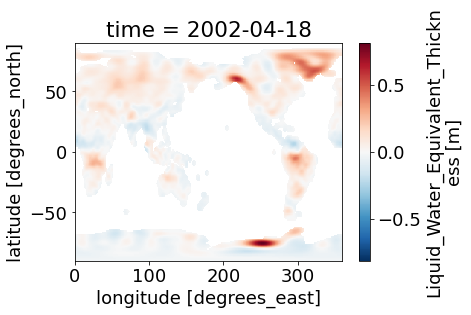

In [21]:
# check file
print(gr_csr)

gr_csr.lwe_thickness[0].plot()

Everything is alright with this file: coordinates are ok, lwe_thickness is within range, and time is also correct.
xr.open_mfdataset performed as expected.
The Longitude convention for this file goes from 0 to 360. I'll change to -180 to 180 later.

In [22]:
# GRACE-FO
## CSR
list_gf_csr = glob.glob('../data/external/gracefo/land_mass/RL06/v03/CSR/*.nc')
list_gf_csr.sort()
gf_csr_datsets=[]
for datefile in tqdm(list_gf_csr):
    file = xr.open_dataset(datefile)
    gf_csr_datsets.append(file)
gf_csr = xr.merge(gf_csr_datsets)

## JPL
list_gf_jpl = glob.glob('../data/external/gracefo/land_mass/RL06/v03/JPL/*.nc')
list_gf_jpl.sort()
gf_jpl_datsets=[]
for datefile in tqdm(list_gf_jpl):
    file = xr.open_dataset(datefile)
    gf_jpl_datsets.append(file)
gf_jpl = xr.merge(gf_jpl_datsets)

## GFZ
list_gf_gfz = glob.glob('../data/external/gracefo/land_mass/RL06/v03/GFZ/*.nc')
list_gf_gfz.sort()
gf_gfz_datsets=[]
for datefile in tqdm(list_gf_gfz):
    file = xr.open_dataset(datefile)
    gf_gfz_datsets.append(file)
gf_gfz = xr.merge(gf_gfz_datsets)


100%|██████████| 31/31 [00:00<00:00, 94.52it/s] 


<xarray.Dataset>
Dimensions:        (bounds: 2, lat: 312, lon: 520, time: 31)
Coordinates:
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 88.5 89.5
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 358.5 358.5 359.5 359.5
  * time           (time) datetime64[ns] 2018-06-16 2018-07-10 ... 2021-02-15
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 0.05402 0.05409 0.05417 ... nan nan
    lat_bounds     (lat, bounds) float64 -90.0 -89.0 -89.0 ... 89.0 89.0 90.0
    lon_bounds     (lon, bounds) float64 0.0 1.0 1.0 2.0 ... 360.0 359.0 360.0
    time_bounds    (time, bounds) datetime64[ns] 2018-06-01 ... 2021-03-01


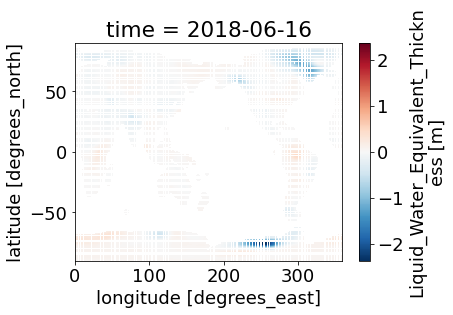

In [23]:
# check file
print(gf_csr)

gf_csr.lwe_thickness[0].plot()

In [24]:
print(gf_csr.lat.values[0:10])

print(gf_csr.lon.values[0:10])

[-89.5 -88.5 -87.5 -86.5 -85.5 -85.5 -84.5 -84.5 -83.5 -83.5]
[0.5 1.5 2.5 3.5 4.5 5.5 5.5 6.5 6.5 7.5]


This file has some weird behaviour going on, the coordinates are striped, the dimension of the value is way greater than for each file.
For each individual file, it was expected a grid of 180 x 360, but the merged file returned 312 x 520. 
xr.open_mfdataset is repeating some coordinates while performing the merge. 
One way to fix this behaviour is to open each file individually and appending it to an empty data frame and then format it to a NetCDF file. This operation is gonna be performed for GRACE and GRACE-FO datasets, returning one single unique file for each centre solution.



In [25]:
# to correct that error files are gonna be open one by one and then appended into a single final file containing both GRACE and GRACE-FO 
## CRS
### list files
list_gr_csr = glob.glob('../data/external/grace/land_mass/RL06/v03/CSR/*.nc')
list_gr_csr.sort()

list_gf_csr = glob.glob('../data/external/gracefo/land_mass/RL06/v03/CSR/*.nc')
list_gf_csr.sort()

### join list together
list_csr = list_gr_csr + list_gf_csr

### open first file as a template
data = xr.open_dataset(list_csr[0])

### create netcdf with the desired dimentions and type
nc = np.zeros([len(list_csr), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_csr), dtype='datetime64[s]')

### loop through all the files
for i in tqdm(range(0,len(list_csr))):
    data = xr.open_dataset(list_csr[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

### create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
csr = var.to_dataset(name = 'lwe_thickness')
csr['lon'].attrs = data.lon.attrs
csr['lat'].attrs = data.lat.attrs
csr['time'].attrs = data.time.attrs
csr['lwe_thickness'].attrs = data.lwe_thickness.attrs


## JPL
### list files
list_gr_jpl = glob.glob('../data/external/grace/land_mass/RL06/v03/JPL/*.nc')
list_gr_jpl.sort()

list_gf_jpl = glob.glob('../data/external/gracefo/land_mass/RL06/v03/JPL/*.nc')
list_gf_jpl.sort()

### join list together
list_jpl = list_gr_jpl + list_gf_jpl

### open first file as a template
data = xr.open_dataset(list_jpl[0])

### create netcdf with the desired dimentions and type
nc = np.zeros([len(list_jpl), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_jpl), dtype='datetime64[s]')

### loop through all the files
for i in tqdm(range(0,len(list_jpl))):
    data = xr.open_dataset(list_jpl[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

### create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
jpl = var.to_dataset(name = 'lwe_thickness')
jpl['lon'].attrs = data.lon.attrs
jpl['lat'].attrs = data.lat.attrs
jpl['time'].attrs = data.time.attrs
jpl['lwe_thickness'].attrs = data.lwe_thickness.attrs

## GFZ
### list files
list_gr_gfz = glob.glob('../data/external/grace/land_mass/RL06/v03/GFZ/*.nc')
list_gr_gfz.sort()

list_gf_gfz = glob.glob('../data/external/gracefo/land_mass/RL06/v03/GFZ/*.nc')
list_gf_gfz.sort()

### join list together
list_gfz = list_gr_gfz + list_gf_gfz

### open first file as a template
data = xr.open_dataset(list_gfz[0])

### create netcdf with the desired dimentions and type
nc = np.zeros([len(list_gfz), data.lwe_thickness.values.shape[1], data.lwe_thickness.values.shape[2]])
time = np.zeros(len(list_gfz), dtype='datetime64[s]')

### loop through all the files
for i in tqdm(range(0,len(list_gfz))):
    data = xr.open_dataset(list_gfz[i])
    nc[i] = data.lwe_thickness.values
    time[i] = data.time.values[0]

### create netcdf file
var = xr.DataArray(nc, dims=['time','lat', 'lon'],
                   coords={'time': time, 'lat': data.lat.values, 'lon': data.lon.values})
gfz = var.to_dataset(name = 'lwe_thickness')
gfz['lon'].attrs = data.lon.attrs
gfz['lat'].attrs = data.lat.attrs
gfz['time'].attrs = data.time.attrs
gfz['lwe_thickness'].attrs = data.lwe_thickness.attrs

100%|██████████| 194/194 [00:02<00:00, 89.99it/s] 


<xarray.Dataset>
Dimensions:        (lat: 180, lon: 360, time: 194)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 ... 2021-02-15
  * lat            (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon            (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Data variables:
    lwe_thickness  (time, lat, lon) float64 -0.02797 -0.02799 -0.028 ... nan nan


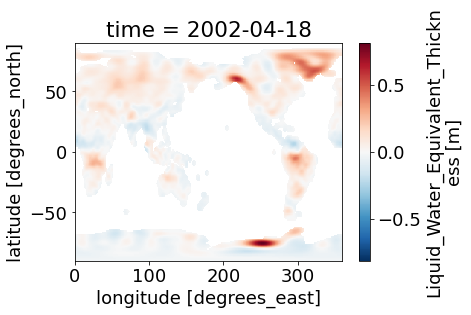

In [26]:
# check file
print(csr)

csr.lwe_thickness[0].plot()

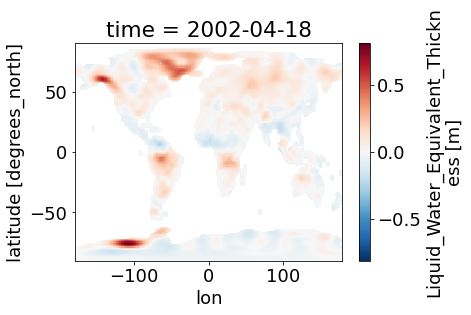

In [27]:
# convert longitude to -180 180 range
csr = csr.assign_coords(lon=(((csr.lon + 180) % 360) - 180)).sortby('lon')
jpl = jpl.assign_coords(lon=(((jpl.lon + 180) % 360) - 180)).sortby('lon')
gfz = gfz.assign_coords(lon=(((gfz.lon + 180) % 360) - 180)).sortby('lon')

# plot
csr.lwe_thickness[0].plot()

Now, this file has the correct dimensions, lwe_thickness is within range, and the time is also correct.
The files are gonna be saved to avoid reprocessing.

In [28]:
# save files
csr.to_netcdf('../data/processed/crs.nc') #golbal dataset
jpl.to_netcdf('../data/processed/jpl.nc') #golbal dataset
gfz.to_netcdf('../data/processed/gfz.nc') #golbal dataset

**Compare Centers' Solutions**

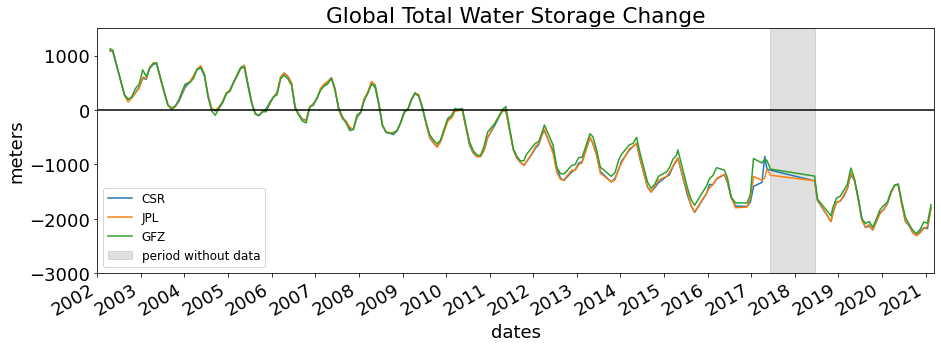

In [29]:
# compare solutions using global total water storage 

import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt 
import pandas as pd

# plot
fig, ax = plt.subplots(figsize=(15,5))

global_crs = csr.lwe_thickness.sum(dim=['lat','lon'], skipna=True) # global sum
plt.plot(global_crs.time, global_crs.values, label = 'CSR')

global_jpl = jpl.lwe_thickness.sum(dim=['lat','lon'], skipna=True) # global sum
plt.plot(global_jpl.time, global_jpl.values, label = 'JPL')

global_gfz = gfz.lwe_thickness.sum(dim=['lat','lon'], skipna=True) # global sum
plt.plot(global_gfz.time, global_gfz.values, label = 'GFZ')

# horizontal line in 0
plt.axhline(y=0, color = 'k')

# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2021-03-15"))
fig.autofmt_xdate()
plt.xlabel('dates')

# format y label
# plt.yticks(np.arange(-3, 4, 1)) 
plt.ylabel('meters')

# Title and axis
plt.title('Global Total Water Storage Change')

# set y axis min and max
ymin = -3000
ymax = 1500
plt.ylim(ymin, ymax)

# mark where there's no data
gap_start = '2017-06-10T12:00:00.000000000'
gap_end = '2018-06-16T00:00:00.000000000'
plt.fill_betweenx([ymin,ymax], gap_start, gap_end, color='gray', alpha=.25, label = 'period without data')

# legend 
plt.legend(prop={'size':12}, loc = 'lower left')

# save figure
plt.savefig('../figures/03_tws_global.png',bbox_inches = 'tight', dpi=600)

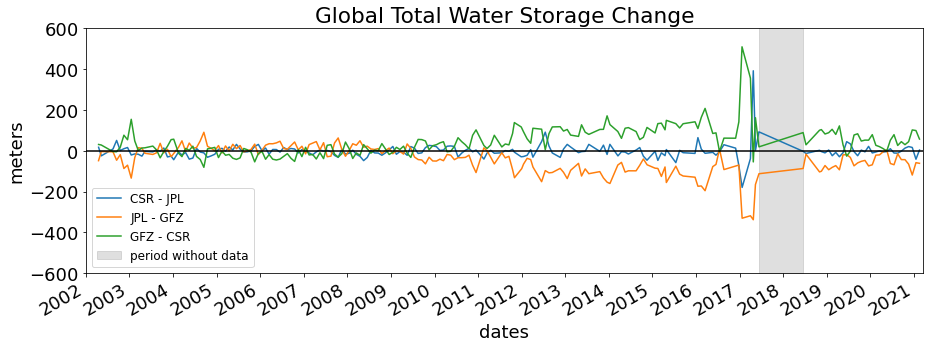

In [30]:
# compare diferences
# plot
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(global_crs.time, global_crs.values - global_jpl.values, label = 'CSR - JPL')

plt.plot(global_jpl.time, global_jpl.values - global_gfz.values, label = 'JPL - GFZ')

plt.plot(global_gfz.time, global_gfz.values - global_crs.values, label = 'GFZ - CSR')


# horizontal line in 0
plt.axhline(y=0, color = 'k')

# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2021-03-15"))
fig.autofmt_xdate()
plt.xlabel('dates')

# format y label
# plt.yticks(np.arange(-3, 4, 1)) 
plt.ylabel('meters')

# Title and axis
plt.title('Global Total Water Storage Change')

# set y axis min and max
ymin = -600
ymax = 600
plt.ylim(ymin, ymax)

# mark where there's no data
gap_start = '2017-06-10T12:00:00.000000000'
gap_end = '2018-06-16T00:00:00.000000000'
plt.fill_betweenx([ymin,ymax], gap_start, gap_end, color='gray', alpha=.25, label = 'period without data')

# legend 
plt.legend(prop={'size':12}, loc='lower left')

# save figure
plt.savefig('../figures/04_tws_global_difference.png',bbox_inches = 'tight', dpi=600)

The graphs above have a few interesting features:
- it seems that the global water storage change has a negative linear trend 
- it has a seasonal behaviour, maintaining a similar amplitude
- the centres' solutions are very similar, specially between CSR and JPL
- The diferences are higher after 2011 until 2017, when GRACE stopped its mission

With this knowledge some decisions for the further steps were made:
- the final solution will be the mean of the 3 centres'
- the dataset it's gonna be fit into a sine model, this will allow to fill the gap between the months without data in 2017-2018

**Extract TWS within the desired Basins**

In [31]:
# Functions to extract raster value within a shapefile geometry
# solution adapeted from https://stackoverflow.com/questions/51398563/python-mask-netcdf-data-using-shapefile

from rasterio import features
from affine import Affine
import numpy as np


def transform_from_latlon(lat, lon):
    """ input 1D array of lat / lon and output an Affine transformation
    """
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, lat='lat', lon='lon',
              fill=np.nan, **kwargs):
    """Rasterize a list of (geometry, fill_value) tuples onto the given
    xray coordinates. This only works for 1d latitude and longitude
    arrays.

    usage:
    -----
    1. read shapefile to geopandas.GeoDataFrame
          `states = gpd.read_file(shp_dir+shp_file)`
    2. encode the different shapefiles that capture those lat-lons as different
        numbers i.e. 0.0, 1.0 ... and otherwise np.nan
          `shapes = (zip(states.geometry, range(len(states))))`
    3. Assign this to a new coord in your original xarray.DataArray
          `ds['states'] = rasterize(shapes, ds.coords, longitude='X', latitude='Y')`

    arguments:
    ---------
    : **kwargs (dict): passed to `rasterio.rasterize` function

    attrs:
    -----
    :transform (affine.Affine): how to translate from latlon to ...?
    :raster (numpy.ndarray): use rasterio.features.rasterize fill the values
      outside the .shp file with np.nan
    :spatial_coords (dict): dictionary of {"X":xr.DataArray, "Y":xr.DataArray()}
      with "X", "Y" as keys, and xr.DataArray as values

    returns:
    -------
    :(xr.DataArray): DataArray with `values` of nan for points outside shapefile
      and coords `Y` = latitude, 'X' = longitude.


    """
    transform = transform_from_latlon(coords[lat], coords[lon])
    out_shape = (len(coords[lat]), len(coords[lon]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {lat: coords[lat], lon: coords[lon]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(lat, lon))

def add_shape_coord_from_data_array(xr_da, shp_gpd, coord_name):
    """ Create a new coord for the xr_da indicating whether or not it 
         is inside the shapefile

        Creates a new coord - "coord_name" which will have integer values
         used to subset xr_da for plotting / analysis/

        Usage:
        -----
        precip_da = add_shape_coord_from_data_array(precip_da, "awash.shp", "awash")
        awash_da = precip_da.where(precip_da.awash==0, other=np.nan) 
    """

    # 1. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 2. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               lon='lon', lat='lat')

    return xr_da

In [32]:
# extracting values 
# # whole SA
csr = add_shape_coord_from_data_array(csr, SA_basins, 'basins')
basins_dissolved_csr = csr.where(csr.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

jpl = add_shape_coord_from_data_array(jpl, SA_basins, 'basins')
basins_dissolved_jpl = jpl.where(jpl.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

# whole SA
gfz = add_shape_coord_from_data_array(gfz, SA_basins, 'basins')
basins_dissolved_gfz = gfz.where(gfz.basins>=0) # when crs.basins >0 is where the raster values where clipped for each basin

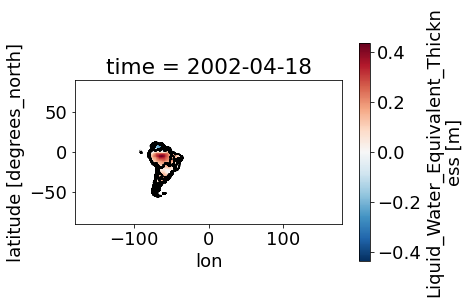

In [33]:
# plot
ax = SA_basins.boundary.plot(edgecolor="black")
basins_dissolved_csr.lwe_thickness[0].plot(ax=ax,zorder=-1)


### Amazon

In [34]:
# amazon basin
i = 0 

# extract sum from basin
## CSR
basins_dissolved_csr = csr.where(csr.basins==i)
basin_ts_csr = basins_dissolved_csr.lwe_thickness.sum(['lat', 'lon']).values

## JPL
basins_dissolved_jpl = jpl.where(jpl.basins==i)
basin_ts_jpl = basins_dissolved_jpl.lwe_thickness.sum(['lat', 'lon']).values

## GFZ
basins_dissolved_gfz = gfz.where(csr.basins==i)
basin_ts_gfz = basins_dissolved_gfz.lwe_thickness.sum(['lat', 'lon']).values

# save into a dataframe and perform a mean of the solutions
amazon = pd.DataFrame({
    'date': pd.to_datetime(csr.time.values).strftime('%Y-%m-%d'), 
    'csr' : basin_ts_csr,
    'jpl' : basin_ts_jpl,
    'gfz': basin_ts_gfz,
    'mean': np.mean([basin_ts_csr,basin_ts_jpl, basin_ts_gfz], axis = 0 )
})

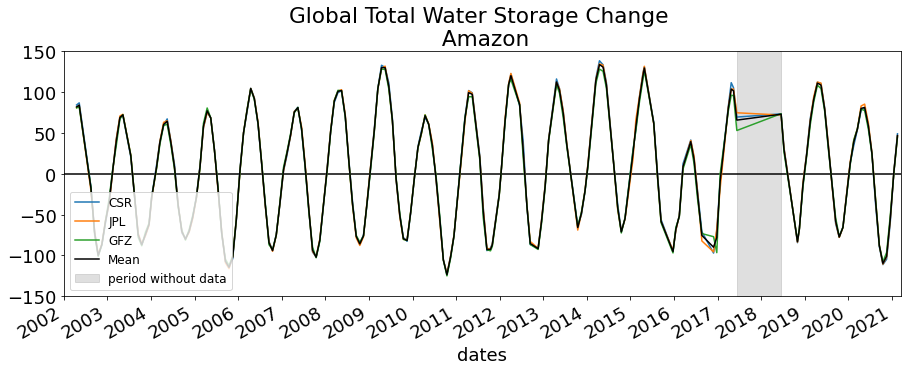

In [56]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon['date'], amazon['csr'], color = colors[0], label='CSR')
plt.plot(amazon['date'], amazon['jpl'], color = colors[1], label='JPL')
plt.plot(amazon['date'], amazon['gfz'], color = colors[2], label='GFZ')
plt.plot(amazon['date'], amazon['mean'], color = 'k', label='Mean')


plt.title('Global Total Water Storage Change \n Amazon')

# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2021-03-15"))
fig.autofmt_xdate()
plt.xlabel('dates')

# set y axis min and max
ymin = -150
ymax = 150
plt.ylim(ymin, ymax)

# mark where there's no data
gap_start = '2017-06-10T12:00:00.000000000'
gap_end = '2018-06-16T00:00:00.000000000'
plt.fill_betweenx([ymin,ymax], gap_start, gap_end, color='gray', alpha=.25, label = 'period without data')


plt.legend(prop={'size':12}, loc = 'lower left')

plt.savefig('../figures/05_tws_amazon.png',bbox_inches = 'tight', dpi=600)

### Models

- Non-Linear Least-Squares Minimization and Curve-Fitting (LMFIT)
- statsmodels seasonal decompose using moving averages (seasonal_decompose)
- statsmodels seasonal decompose using Seasonal-Trend decomposition using LOESS (SLT)

**Fill empty months with zero**

In [38]:
# amazon
amazon.date = pd.to_datetime(amazon.date)
amazon_model = amazon


newdatesindex = []
for i in iter(range(0,len(amazon_model.date))):
    newdatesindex.append(amazon_model.date[i].to_period('M')) # remove day of the month

# resample into monthly mean
amazon_model.index = newdatesindex
amazon_model.index = amazon_model.index.to_timestamp()
amazon_model = amazon_model.resample('M').mean()
amazon_model['date'] = amazon_model.index
amazon_model = amazon_model.reset_index()

# replace nan with zeros
amazon_model['mean'] = amazon_model['mean'].fillna(0)
amazon_model.date = pd.to_datetime(amazon_model.date)

# show df
amazon_model

,index,csr,jpl,gfz,mean,date
0,2002-04-30,84.369257,80.924856,80.802957,82.032357,2002-04-30
1,2002-05-31,86.965760,83.802493,81.803649,84.190634,2002-05-31
2,2002-06-30,NaN,NaN,NaN,0.000000,2002-06-30
3,2002-07-31,NaN,NaN,NaN,0.000000,2002-07-31
4,2002-08-31,-15.668626,-20.241679,-16.107215,-17.339174,2002-08-31
...,...,...,...,...,...,...
222,2020-10-31,-111.266000,-110.649812,-107.815862,-109.910558,2020-10-31
223,2020-11-30,-104.686048,-101.829308,-96.368099,-100.961151,2020-11-30
224,2020-12-31,-60.592933,-56.688407,-52.254137,-56.511825,2020-12-31
225,2021-01-31,3.093164,2.729393,1.607364,2.476640,2021-01-31


**Non-Linear Least-Squares Minimization and Curve-Fitting(LMFIT)**

In [39]:
from scipy.signal import find_peaks
from lmfit.model import Model

# find amplitude
positive_peaks_idx = find_peaks(amazon_model['mean'])[0]
neagtive_peaks_idx = find_peaks(-amazon_model['mean'])[0]

amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx))):
    amplitudes.append(amazon_model['mean'][positive_peaks_idx[i]] - amazon_model['mean'][neagtive_peaks_idx[i]])

# fit sine
def mysine(x, amp, freq, shift):
    return amp * np.sin(x*freq + shift)

x = amazon_model.index
y = amazon_model['mean']

model = Model(mysine)
params = model.make_params(amp=np.mean(amplitudes), freq=1/2, shift=0)
params['shift'].max = 10
params['shift'].min = -10
params['amp'].min = 100
params['amp'].max = 150
params['freq'].min = 1/10
params['freq'].max = 2


result = model.fit(y, params, x=x)
yy = result.best_fit
print(result.fit_report())

yyy = result.init_fit

# save model
amazon_model['lmfit'] = yy
amazon_model['lmfit_init_lmfit'] = yyy

[[Model]]
    Model(mysine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 600
    # data points      = 227
    # variables        = 3
    chi-square         = 289594.890
    reduced chi-square = 1292.83433
    Akaike info crit   = 1629.34244
    Bayesian info crit = 1639.61729
[[Variables]]
    amp:    100.000000 +/- 2.89615244 (2.90%) (init = 126.9719)
    freq:   0.52302340 +/- 5.1410e-04 (0.10%) (init = 0.5)
    shift: -4.78681488 +/- 0.06751935 (1.41%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(freq, shift) = -0.866


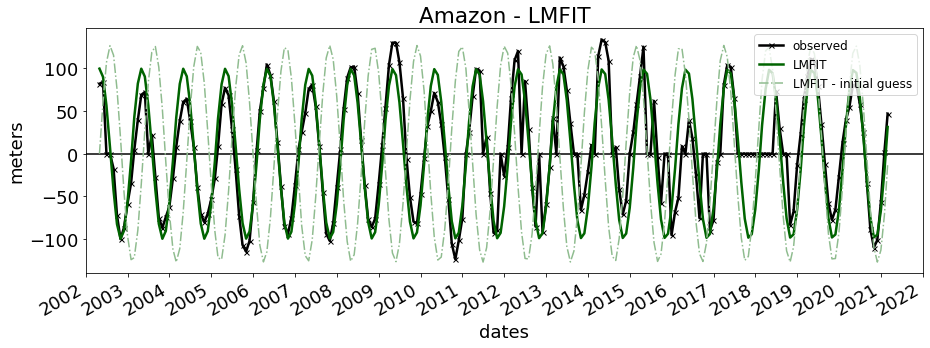

In [40]:
# plot result
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon_model['date'], amazon_model['mean'], color = 'k', ls = '-', marker = 'x', lw = 2.5, markersize = 5, label='observed')
plt.plot(amazon_model['date'], amazon_model['lmfit'], 'darkgreen', ls = '-', lw = 2.5, label='LMFIT')
plt.plot(amazon_model['date'], amazon_model['lmfit_init_lmfit'], 'darkseagreen', ls = '-.', lw = 1.5, label='LMFIT - initial guess')

plt.title('Amazon - LMFIT')
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})

plt.savefig('../figures/07_amazon_lmfit.png',bbox_inches = 'tight', dpi=600)

In [41]:
# estimate trend
amazon_model['lmfit_trend'] = amazon_model['mean'] - amazon_model['lmfit']
amazon_model['lmfit_trend_rolling'] = (amazon_model['mean'] - amazon_model['lmfit']).rolling(window=12,center=True).mean()

In [42]:
# stats
# correlation
corr_lmfit = np.corrcoef(amazon_model['mean'], amazon_model['lmfit'])[0][1]
print('correlation for LMFIT:', corr_lmfit)

# frequency
positive_peaks_idx = find_peaks(amazon_model['lmfit'])[0]
freq_lmfit = np.median(np.diff(positive_peaks_idx))
print('frequency for LMFIT:', freq_lmfit)

# amplitude
neagtive_peaks_idx = find_peaks(-amazon_model['lmfit'])[0]
amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx))):
    amplitudes.append(amazon_model['lmfit'][positive_peaks_idx[i]] - amazon_model['lmfit'][neagtive_peaks_idx[i]])
amp_lmfit = np.mean(amplitudes)
print('amplitude for LMFIT:', amp_lmfit)




correlation for LMFIT: 0.8653084853263414
frequency for LMFIT: 12.0
amplitude for LMFIT: 197.96321462175104


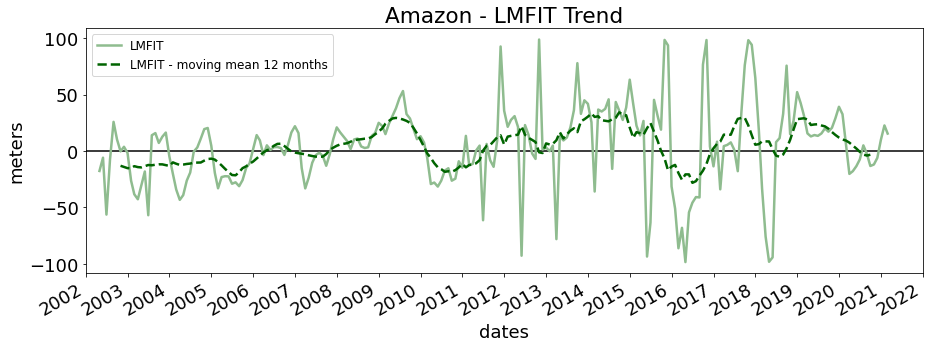

In [43]:
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon_model['date'], amazon_model['lmfit_trend'], 
         color = "darkseagreen", lw=2.5, label = 'LMFIT')
plt.plot(amazon_model['date'],amazon_model['lmfit_trend_rolling'],
        color = 'darkgreen', ls = '--', lw = 2.5, label = 'LMFIT - moving mean 12 months'
        )

plt.title('Amazon - LMFIT Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})
plt.savefig('../figures/07_amazon_lmfit_trend.png',bbox_inches = 'tight', dpi=600)

The observation was fit into a sine model (y = amp * np.sin(x*freq + shift)).
The estimated amplitude is 126.9719 and the model one is 100.
The estimated frequency is 0.5 and the model one is 0.52302340.
The modelled shift is -4.78681488.

In the graph is noticeable that the first guess of the parameters are a bit off. The amplitude is a bit too much, especially for the lowest values, and the shift adjustment made the model stay in sync with the observed data.
Tre frequency was a good guess.

LMFIT has a correlation of 0.86, a frequency od 12 months, and a amplitude of 197.96 m.

**Seasonal-Trend decomposition using LOESS (STL)**

In [44]:
seasonal = 12 + ((12 % 2) == 0)  # Ensure odd

# non robust
amazon_STL = STL(amazon_model['mean'], period=12, seasonal=seasonal)
amazon_STL = amazon_STL.fit()

# robust
amazon_STL_robust = STL(amazon_model['mean'], period=12, seasonal=seasonal, robust=True)
amazon_STL_robust = amazon_STL_robust.fit()

# save model
amazon_model['STL_seasonal'] = amazon_STL.seasonal
amazon_model['STL_robust_seasonal'] = amazon_STL_robust.seasonal

amazon_model['STL_trend'] = amazon_STL.trend
amazon_model['STL_robust_trend'] = amazon_STL_robust.trend

amazon_model['STL_resid'] = amazon_STL.resid
amazon_model['STL_robust_resid'] = amazon_STL_robust.resid


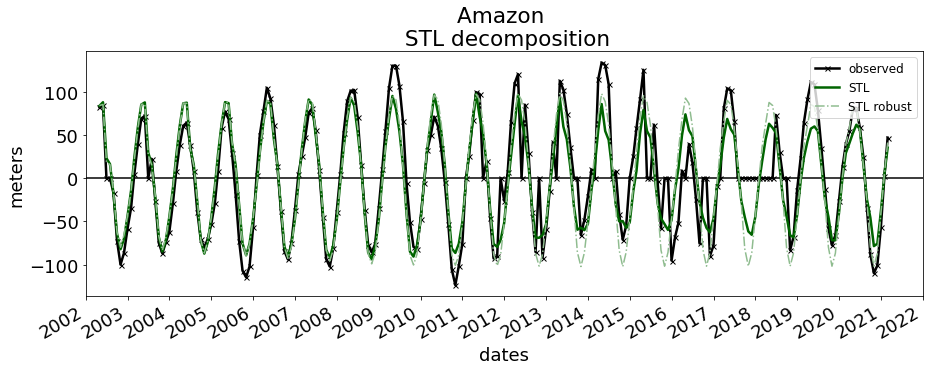

In [45]:
# plot result
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon_model['date'], amazon_model['mean'], color = 'k', ls = '-', marker = 'x', lw = 2.5, markersize = 5, label='observed')
plt.plot(amazon_model['date'], amazon_model['STL_seasonal'], 'darkgreen', ls = '-', lw = 2.5, label='STL')
plt.plot(amazon_model['date'], amazon_model['STL_robust_seasonal'], 'darkseagreen', ls = '-.', lw = 1.5, label='STL robust')

plt.title('Amazon \n STL decomposition')
ax.xaxis_date()
years = mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})

plt.savefig('../figures/07_amazon_stl.png',bbox_inches = 'tight', dpi=600)

In [46]:
# stats
# correlation
corr_STL = np.corrcoef(amazon_model['mean'], amazon_model['STL_seasonal'])[0][1]
print('correlation for STL:', corr_STL)

corr_STL_robust = np.corrcoef(amazon_model['mean'], amazon_model['STL_robust_seasonal'])[0][1]
print('correlation for STL robust:', corr_STL_robust)

# frequency
positive_peaks_idx = find_peaks(amazon_model['STL_seasonal'])[0]
freq_STL = np.median(np.diff(positive_peaks_idx))
print('frequency for STL:', freq_STL)

positive_peaks_idx_robust = find_peaks(amazon_model['STL_robust_seasonal'])[0]
freq_STL_robust = np.median(np.diff(positive_peaks_idx_robust))
print('frequency for STL robust:', freq_STL_robust)

# amplitude
neagtive_peaks_idx = find_peaks(-amazon_model['STL_seasonal'])[0]
amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx))):
    amplitudes.append(amazon_model['STL_seasonal'][positive_peaks_idx[i]] - amazon_model['STL_seasonal'][neagtive_peaks_idx[i]])
amp_STL = np.mean(amplitudes)
print('amplitude for STL:', amp_STL)

neagtive_peaks_idx_robust = find_peaks(-amazon_model['STL_robust_seasonal'])[0]
amplitudes_robust =[]
for i in iter(range(0,len(positive_peaks_idx_robust))):
    amplitudes_robust.append(amazon_model['STL_robust_seasonal'][positive_peaks_idx_robust[i]] - amazon_model['STL_robust_seasonal'][neagtive_peaks_idx_robust[i]])
amp_STL_robust = np.mean(amplitudes_robust)
print('amplitude for STL robust:', amp_STL_robust)


correlation for STL: 0.8878268741678166
correlation for STL robust: 0.8651769960570452
frequency for STL: 12.0
frequency for STL robust: 12.0
amplitude for STL: 146.07982335943268
amplitude for STL robust: 188.55279589043903


In [47]:
neagtive_peaks_idx_robust = find_peaks(-amazon_model['STL_robust_seasonal'])[0]

amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx_robust))):
    amplitudes.append(amazon_model['STL_robust_seasonal'][positive_peaks_idx_robust[i]] - amazon_model['STL_robust_seasonal'][neagtive_peaks_idx_robust[i]])
np.mean(amplitudes)

188.55279589043903

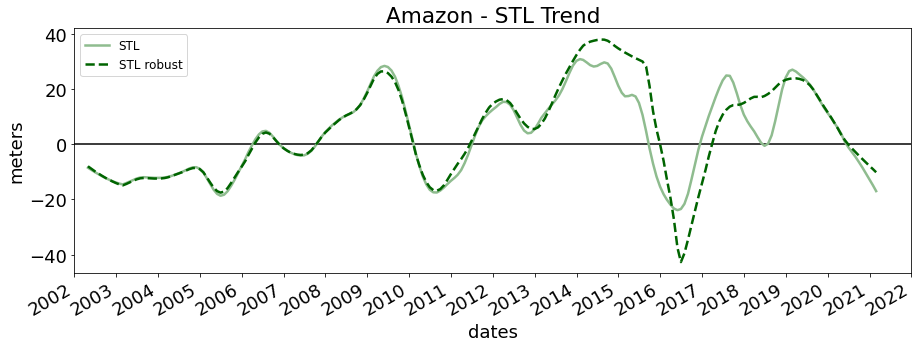

In [48]:
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon_model['date'], amazon_model['STL_trend'], 
         color = "darkseagreen", lw=2.5, label = 'STL')
plt.plot(amazon_model['date'],amazon_model['STL_robust_trend'],
        color = 'darkgreen', ls = '--', lw = 2.5, label = 'STL robust'
        )

plt.title('Amazon - STL Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})
plt.savefig('../figures/07_amazon_stl_trend.png',bbox_inches = 'tight', dpi=600)

The observation was decomposed into 3 different signals: seasonal, trend, and residual. Adding those will result in the original imput data.

This decomposition has several parameters, I analized only with and without robust. Both decompositions have a 12 months frequency, this means that TWS has a yearly cycle. The maisn difference is the amplitude, both decompositions have a varying amplitude, the robust method varies way less than the non-robust conterpart. The average amplitude is 188.56 m for the robust method and 146.01 for the non-robust one.
The correlation for STL is 0.89 and for STL robust is 0.87.


**seasonal decompose (SD)**

In [49]:
amazon_seasonal_decompose = seasonal_decompose(amazon_model['mean'], model='additive', period=12) # additive because the aplitude is the same

# save model
amazon_model['SD_seasonal'] = amazon_seasonal_decompose.seasonal
amazon_model['SD_trend'] = amazon_seasonal_decompose.trend
amazon_model['SD_resid'] = amazon_seasonal_decompose.resid

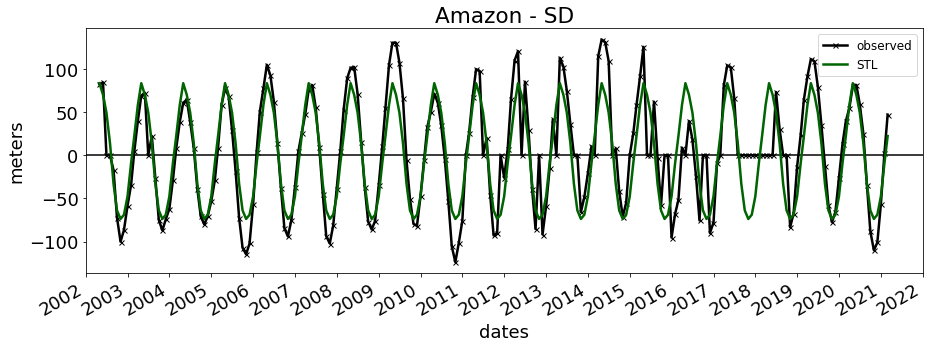

In [50]:
# plot result
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon_model['date'], amazon_model['mean'], color = 'k', ls = '-', marker = 'x', lw = 2.5, markersize = 5, label='observed')
plt.plot(amazon_model['date'], amazon_model['SD_seasonal'], 'darkgreen', ls = '-', lw = 2.5, label='STL')

plt.title('Amazon - SD')
ax.xaxis_date()
years = mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})

plt.savefig('../figures/07_amazon_SD.png',bbox_inches = 'tight', dpi=600)

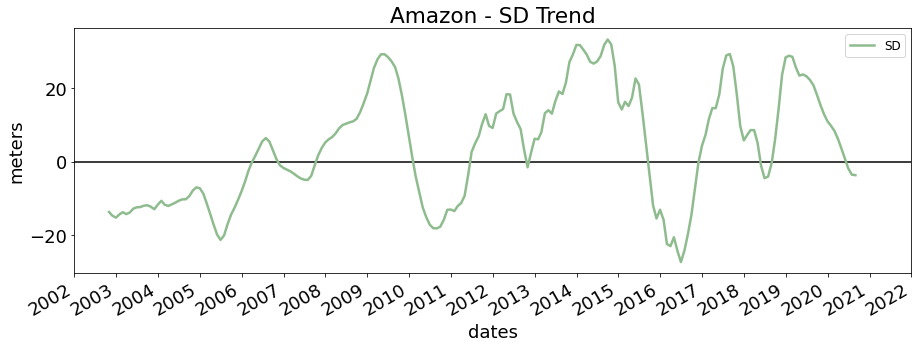

In [51]:
fig, ax = plt.subplots(figsize=(15,5))

plt.axhline(y=0, color = 'k')

plt.plot(amazon_model['date'], amazon_model['SD_trend'], 
         color = "darkseagreen", lw=2.5, label = 'SD')


plt.title('Amazon - SD Trend')
# format dates x axis
ax.xaxis_date()
years =mdates.YearLocator(1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')
plt.ylabel('meters')

plt.legend(prop={'size':12})
plt.savefig('../figures/07_amazon_SD_trend.png',bbox_inches = 'tight', dpi=600)

In [52]:
# stats
# correlation
corr_SD = np.corrcoef(amazon_model['mean'], amazon_model['SD_seasonal'])[0][1]
print('correlation for SD:', corr_SD)

# frequency
positive_peaks_idx = find_peaks(amazon_model['SD_seasonal'])[0]
freq_SD = np.median(np.diff(positive_peaks_idx))
print('frequency for SD:', freq_SD)

# amplitude
neagtive_peaks_idx = find_peaks(-amazon_model['SD_seasonal'])[0]
amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx))):
    amplitudes.append(amazon_model['SD_seasonal'][positive_peaks_idx[i]] - amazon_model['SD_seasonal'][neagtive_peaks_idx[i]])
amp_SD = np.mean(amplitudes)
print('amplitude for SD:', amp_STL)



correlation for SD: 0.8658711632061022
frequency for SD: 12.0
amplitude for SD: 146.07982335943268


The observation was decomposed into 3 different signals: seasonal, trend, and residual. Adding those will result in the original imput data.

This is a simple decomposition. The frequency of the signal is 12 months, and the amplitude is  fixed in 146.01 m, and teh correlation of the seasonal signal with the original data is 0.86.


In [53]:
# GRACE amplitude
amplitudes =[]
for i in iter(range(0,len(positive_peaks_idx))):
    amplitudes.append(amazon_model['mean'][positive_peaks_idx[i]] - amazon_model['mean'][neagtive_peaks_idx[i]])
amplitudes = np.array(amplitudes)
print('min amplitude for GR:', np.min(amplitudes[amplitudes>0]))
print('mean amplitude for GR:', np.mean(amplitudes))
print('max amplitude for GR:', np.max(amplitudes))

min amplitude for GR: 103.83907458170894
mean amplitude for GR: 157.25093020221541
max amplitude for GR: 223.09849655048998


All models/decompositions have a similar correlation, varying between 0.86 to 0.88.
GARCE amplitude varies between 103.84 and 223.10, and in average 157.25. SD and STL have an amplitude of 146.08 being the closest ones, followed by STD robust with 188.55 and LMFIT with 197.96 m. 

**ONI x GRAACE Trend**

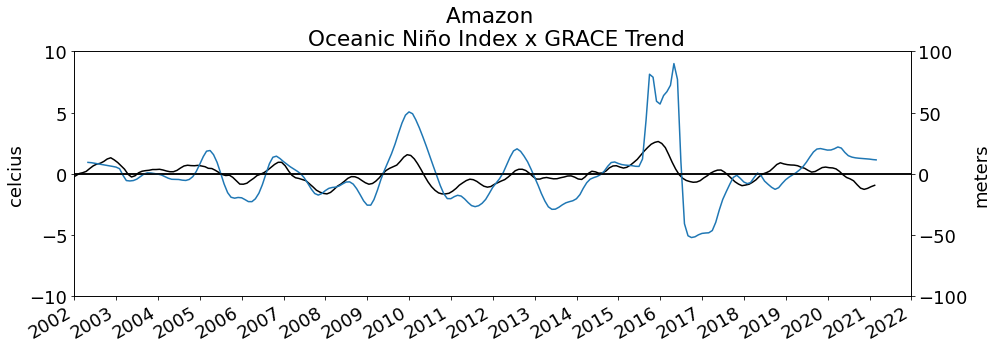

In [54]:
# plot ONI
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.axhline(y=0, color = 'k')

ax2.axhline(y=0, color = 'k')


# plot ONI
ax1.plot(oni.index, oni.ANOM, color = 'k', label = 'ONI')
ax1.plot(amazon_model['date'], -np.gradient(amazon_model['STL_robust_trend']))
# ax1.plot(amazon_model['date'], -amazon_model['STL_robust_trend'].diff())


# ax2.plot(amazon_model['date'], amazon_model['lmfit_trend_rolling'], color = 'darkgreen', lw = 2.5, label ='LMFIT')
# ax2.plot(amazon_model['date'],amazon_model['SD_trend'], color = 'b', ls = '--', lw = 2.5, label ='SD')
# ax2.plot(amazon_model['date'],amazon_model['STL_trend'], color = 'r', ls = '--', lw = 2.5, label ='STL')
# ax2.plot(amazon_model['date'],amazon_model['STL_robust_trend'], color = 'k', ls = '-', lw = 2.5, label ='STL Robust')

# format dates x axis
ax1.xaxis_date()
years =mdates.YearLocator(1)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.set_xlim(pd.Timestamp("2002-01-01"),pd.Timestamp("2022-01-01"))
fig.autofmt_xdate()
plt.xlabel('dates')


# format y label
ax1.set_ylim(-10,10) 
ax1.set_ylabel('celcius')

ax2.set_ylim(-100,100)
ax2.set_ylabel('meters')

# Title and axis
plt.title('Amazon \n Oceanic Niño Index x GRACE Trend')



# mark  ENSO episodes
ymin = -10
ymax = 10
# xaxis.ylim(ymin, ymax)


# ax1.fill_between(oni.index, -6, 6, where=oni.ANOM <= -0.5, facecolor='blue', alpha=0.25)
# ax1.fill_between(oni.index, -6, 6, where=oni.ANOM >= 0.5, facecolor='red', alpha=0.25)

# ax1.fill_between(amazon_model['date'], -6, 6, where=-dydx <= -0.5, facecolor='black', alpha=0.25)
# ax1.fill_between(amazon_model['date'], -6, 6, where=-dydx >= 0.5, facecolor='black', alpha=0.25)


# save figure
plt.savefig('../figures/10_amazon_oni.png',bbox_inches = 'tight', dpi=600)

### Conclusions